In [15]:
import numpy as np
np.random.seed(42)

#generate the Xset
a0=0.6       #bias
a1=0.3       #coefficient for variable 1
a2=0.6       #coefficient for variable 2
#sample 120 values for variable 1 from an uniform distribution
x1=np.random.uniform(-5,5,120)
#sample 120 values for variable 2 from a normal distribution
x2=np.random.normal(-1,1,120)
e=np.random.normal(-0.1,0.1,120)  #error in observation as a gaussian

#create the data matrix to estimate the underlying linear function y=a0+a1*x1+a2*x2
data=np.zeros((120,3))  #create X (data matrix)
data[:,0]=np.ones(120)  # for the bias term
data[:,1]=x1[0:120]
data[:,2]=x2[0:120]

#Generate the observed y values
y=np.zeros(120)
for i in range(120):
    #y[i]=a0+a1*x1[i]+a2*x2[i]+e[i]
    y[i]=a0+a1*x1[i]+a2*x2[i]+e[i]
#y=y-np.mean(y)
# g=[]
# for j in y:
#     if j>=0:
#         g.append(1)
#     else:
#         g.append(0)
print(int(np.mean(y)))

#Decision rule for performing classification based on y
# y>=0 : class 1 and y<0: class 2

#First 100 samples are considered to estimate the coefficient: a0,a1,a2
#Remainig 20 samples are test samples
X=data[:100,:]
Y=y[:100]
print("Shape of the independent variable matrix:", X.shape)
print("Shape of the dependent variable vector:",Y.shape)

#Estimate the coefficients
C=np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X),Y))

print("The estimated value are: a0={:.3f}, a1={:.3f} and a2={:.3f}".format(C[0],C[1],C[2]))
print("The actual values are: a0={:.2f}, a1={:.2f} and a2={:.2f}".format(a0,a1,a2))

#Testing:
#Select a random test sample:
x1_test=x1[110]
x2_test=x2[110]
#estimate y for (x1,x2)
y_test=C[0]+C[1]*x1_test+C[2]*x2_test
print(f"The observed and estimated values are {y[110] :.3f} and {y_test :.3f} respectively")


#Classification using y_test; only for demo 0 is shown as threshold
if y_test>=0:
    print("Class 1")
else:
    print("Class 2")


0
Shape of the independent variable matrix: (100, 3)
Shape of the dependent variable vector: (100,)
The estimated value are: a0=0.504, a1=0.293 and a2=0.606
The actual values are: a0=0.60, a1=0.30 and a2=0.60
The observed and estimated values are -0.163 and -0.061 respectively
Class 2


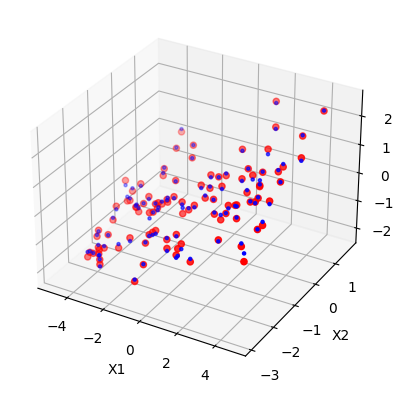

In [16]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Y_pred=np.zeros(100)
for i in range(100):
    Y_pred[i]=C[0]+C[1]*X[i,1]+C[2]*X[i,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:100,1], X[:100,2], Y, marker='o', color='red')
ax.scatter(X[:100,1], X[:100,2], Y_pred, marker='.', color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.show()

In [7]:
print(Y_pred)

[ 0.17677799  3.63721718  2.32360658  1.5228084  -1.13563812 -1.13578298
 -1.72382519  3.12949023  1.53756203  2.17993748 -1.94904079  3.75250353
  2.92689048 -0.79738353 -0.98064814 -0.97116158 -0.24542336  1.07896075
  0.52154555 -0.32357864  1.60205258 -1.23488414 -0.31808019  0.12766016
  0.66643745  2.64301197 -0.87345011  1.01576681  1.48530812 -1.79369292
  1.57617895 -1.04851977 -1.68197626  3.62623379  3.72681141  2.78247708
 -0.24319202 -1.48606098  2.03675974  0.57083874 -1.33972072  0.90130937
 -1.86613532  3.38860991 -0.51846474  1.9063674  -0.20056637  1.05080267
  1.21081316 -0.96245336  3.75055026  2.58269398  3.56985892  3.30156623
  1.5182529   3.46400686 -1.54119272 -0.89561737 -1.80103886 -0.11877061
  0.2616843  -0.4429764   2.90463787  0.06995246 -0.38540706  1.18670433
 -1.22629353  2.74523836 -1.624926    3.85446604  2.56534865 -0.87920436
 -2.03950378  2.82490318  2.17263892  2.30566834  2.55949637 -1.62796493
  0.08023696 -1.37677211  3.11103581  1.6707914  -0